In [3]:
%%file abz7
20 15
 2 24  3 12  9 17  4 27  0 21  6 25  8 27  7 26  1 30  5 31 11 18 14 16 13 39 10 19 12 26
 6 30  3 15 12 20 11 19  1 24 13 15 10 28  2 36  5 26  7 15  0 11  8 23 14 20  9 26  4 28
 6 35  0 22 13 23  7 32  2 20  3 12 12 19 10 23  9 17  1 14  5 16 11 29  8 16  4 22 14 22
 9 20  6 29  1 19  7 14 12 33  4 30  0 32  5 21 11 29 10 24 14 25  2 29  3 13  8 20 13 18
11 23 13 20  1 28  6 32  7 16  5 18  8 24  9 23  3 24 10 34  2 24  0 24 14 28 12 15  4 18
 8 24 11 19 14 21  1 33  7 34  6 35  5 40 10 36  3 23  2 26  4 15  9 28 13 38 12 13  0 25
13 27  3 30  6 21  8 19 12 12  4 27  2 39  9 13 14 12  5 36 10 21 11 17  1 29  0 17  7 33
 5 27  4 19  6 29  9 20  3 21 10 40  8 14 14 39 13 39  2 27  1 36 12 12 11 37  7 22  0 13
13 32 11 29  8 24  3 27  5 40  4 21  9 26  0 27 14 27  6 16  2 21 10 13  7 28 12 28  1 32
12 35  1 11  5 39 14 18  7 23  0 34  3 24 13 11  8 30 11 31  4 15 10 15  2 28  9 26  6 33
10 28  5 37 12 29  1 31  7 25  8 13 14 14  4 20  3 27  9 25 13 31 11 14  6 25  2 39  0 36
 0 22 11 25  5 28 13 35  4 31  8 21  9 20 14 19  2 29  7 32 10 18  1 18  3 11 12 17  6 15
12 39  5 32  2 36  8 14  3 28 13 37  0 38  6 20  7 19 11 12 14 22  1 36  4 15  9 32 10 16
 8 28  1 29 14 40 12 23  4 34  5 33  6 27 10 17  0 20  7 28 11 21  2 21 13 20  9 33  3 27
 9 21 14 34  3 30 12 38  0 11 11 16  2 14  5 14  1 34  8 33  4 23 13 40 10 12  6 23  7 27
 9 13 14 40  7 36  4 17  0 13  5 33  8 25 13 24 10 23  3 36  2 29  1 18 11 13  6 33 12 13
 3 25  5 15  2 28 12 40  7 39  1 31  8 35  6 31 11 36  4 12 10 33 14 19  9 16 13 27  0 21
12 22 10 14  0 12  2 20  5 12  1 18 11 17  8 39 14 31  3 31  7 32  9 20 13 29  4 13  6 26
 5 18 10 30  7 38 14 22 13 15 11 20  9 16  3 17  1 12  2 13 12 40  6 17  8 30  4 38  0 13
 9 31  8 39 12 27  1 14  5 33  3 31 11 22 13 36  0 16  7 11 14 14  4 29  6 28  2 22 10 17

Writing abz7


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
def randRep(n, m):
    rep = [i for i in range(n)]*m
    pos = []
    random.shuffle(rep)
    rep = np.array(rep)
    for i in range(n):
        pos.append((rep == i).nonzero()[0].tolist())
    return np.array(rep), np.array(pos)

In [6]:
def calcMakespan(rep, n, m, jobs, mstart, jend, idxs):
    makespan = 0
    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
        mstart[midx] = max(mstart[midx], jend[e]) + time
        #mstart[midx] = np.amax([mstart[midx], jend[e]]) + time#max(mstart[midx], jend[e]) + time
        jend[e] = mstart[midx]
        if mstart[midx] > makespan:
            makespan = mstart[midx]

    return makespan

In [7]:
def mkSolution(rep, n, m, jobs, makespan):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    schedule = np.zeros((m*10, makespan))

    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        mstart[midx] = max(mstart[midx], jend[e])
        schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
        mstart[midx] += time
        jend[e] = mstart[midx]

    plt.subplots(figsize=(20, 10))
    plt.imshow(schedule)

In [8]:
def nswap(rep, pos, n, m, debug=False):
    numswaps = 2
    while numswaps < n - 1:
        if random.randint(1, 2) == 1:
            break
        else:
            numswaps += 1
    if debug: print(numswaps)
    jobs = random.sample(range(n), numswaps)
    if debug: print(jobs)
    for k in range(numswaps - 1):
        i0 = random.randint(0, m-1)
        j0 = random.randint(0, m-1)
        i = pos[jobs[k], i0]
        j = pos[jobs[k+1], j0]
        if debug: print(i0, j0, i, j)
        rep[i], rep[j] = rep[j], rep[i]
        pos[jobs[k], i0], pos[jobs[k+1], j0] = pos[jobs[k+1], j0], pos[jobs[k], i0]
    return rep, pos

# Pregunta 1

Para optimizar el algoritmo propondre utilizar un arreglo numpy enves de la lista λworst. De tal manera que permita remover los indices de las mejores representaciones de manera mas eficiente. Asimismo, vamos a evitar tener que recalcular el makespan de todas las soluciones existentes en cada iteración. Debido a que solo es necesario calcular las soluciones que hicieron swap en la iteración previa.

In [32]:
import time
import math

#import pdb

def ea(n, m, jobs, μ, λ, delay):
    solutions = np.zeros((μ + λ, m*n), dtype=int)
    positions = np.zeros((μ + λ, n, m), dtype=int)
    for i in range(μ + λ):
        rep, pos = randRep(n, m)
        solutions[i] = rep
        positions[i] = pos
    makespans = np.zeros((μ + λ), dtype=int)

    bestMakespan = math.inf
    bestIdx = -1

    timesup = False
    start = time.time()
    iter = 0
    progress = []
    L = 0
    numRandRestarts = 0

    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)

    while not timesup:
        iter += 1

        if iter == 1:
            for i in range(μ + λ):
                makespans[i] = calcMakespan(solutions[i], n, m, jobs, mstart.copy(), jend.copy(), idxs.copy())
        else:
            for i in swap:
                makespans[i] = calcMakespan(solutions[i], n, m, jobs, mstart.copy(), jend.copy(), idxs.copy()) # solo calcular los que hicieron nswap
        
        swap = [] # lista para los indices de las soluciones que hicieron swap
        bestIdx = np.argmin(makespans) # obtener el indice del mejor makespan con funcion de numpy
        bestMakespan = makespans[bestIdx]
        #print("Mejor", bestMakespan, bestIdx)
        
        μbest = np.argpartition(makespans, μ)[:μ]
        λworst = np.array([i for i in range(μ + λ)]) # converti la lista λworst en un arreglo numpy
        for i in μbest:
            λworst = np.delete(λworst, np.where(λworst == i)) # acelerar el proceso de borrado de elementos ya que es numpy

        next = 0
        for i in μbest:
            idx = λworst[next]
            solutions[idx] = solutions[i].copy()
            positions[idx] = positions[i].copy()
            makespans[idx] = makespans[i].copy() # tambien reasignamos el makespan de los mejores a los indices de los peores
            nswap(solutions[i], positions[i], n, m)
            next += 1
            swap.append(i) # guardamos los indices de las reps que hicieron swap
        # it is important to remember that μ and  λ are the same for this 
        progress.append(bestMakespan)
        if time.time() - start >= delay:
            timesup = True
    print("iters:", iter)
    print(numRandRestarts)
    return solutions[bestIdx], bestMakespan, progress

## Ejecutar por 9 min

iters: 90
0


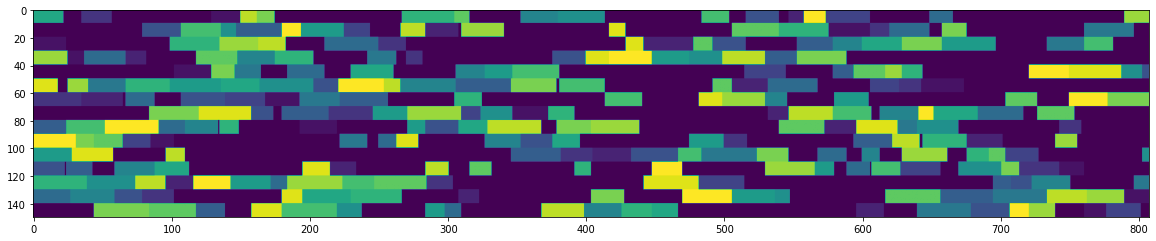

In [33]:
with open('abz7') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

    random.seed(1981)
    rep, makespan, data = ea(n, m, jobs, 2**13, 2**13, 60*9)
    mkSolution(rep, n, m, jobs, makespan)

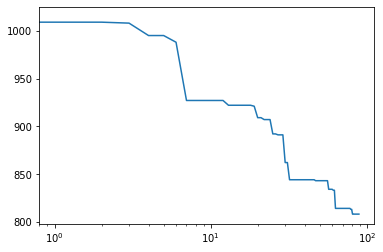

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
plt.show()

In [36]:
makespan

808

In [35]:
print(data)

[1015, 1009, 1009, 1008, 995, 995, 988, 927, 927, 927, 927, 927, 927, 922, 922, 922, 922, 922, 922, 921, 909, 909, 907, 907, 907, 892, 892, 891, 891, 891, 862, 862, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 844, 843, 843, 843, 843, 843, 843, 843, 843, 843, 843, 834, 834, 834, 834, 833, 833, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 814, 813, 813, 808, 808, 808, 808, 808, 808, 808, 808, 808]


# Pregunta 2

Enves de hacer un nswap como en el algoritmo previo, ahora se hara algo llamado recombination. Consiste en elegir a dos de las mejores μ soluciones candidatas y combinar el contenido de las soluciones para producir una nueva. λ soluciones seran descartadas y generadas en cada iteración.

In [37]:
def recombination(x1, x2):
    n = len(x1)
    x = [0]*n
    mark1 = [False]*n
    mark2 = [False]*n
    i1 = 0
    i2 = 0
    i = 0
    for i in range(n):
        if random.randint(1, 100) < 50:
            while mark1[i1]:
                i1 += 1
            p = x1[i1]
            i1 += 1
            for q in range(i2, n):
                if x2[q] == p and not mark2[q]:
                    mark2[q] = True
                    break
        else:
            while mark2[i2]:
                i2 += 1
            p = x2[i2]
            i2 += 1
            for q in range(i1, n):
                if x1[q] == p and not mark1[q]:
                    mark1[q] = True
                    break
        x[i] = p

    return x

In [41]:
import time
import math

def ea_recom(n, m, jobs, μ, λ, delay):
    solutions = np.zeros((μ + λ, m*n), dtype=int)
    positions = np.zeros((μ + λ, n, m), dtype=int)
    for i in range(μ + λ):
        rep, pos = randRep(n, m)
        solutions[i] = rep
        positions[i] = pos
    makespans = np.zeros((μ + λ), dtype=int)

    bestMakespan = math.inf
    bestIdx = -1

    timesup = False
    start = time.time()
    iter = 0
    progress = []
    L = 0
    numRandRestarts = 0

    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)

    while not timesup:
        iter += 1
        print(iter)
        if iter == 1:
            for i in range(μ + λ):
                makespans[i] = calcMakespan(solutions[i], n, m, jobs, mstart.copy(), jend.copy(), idxs.copy())
        else:
            for i in swap:
                makespans[i] = calcMakespan(solutions[i], n, m, jobs, mstart.copy(), jend.copy(), idxs.copy()) # solo calcular los que hicieron nswap
        
        swap = [] # lista para los indices de las soluciones que hicieron swap
        bestIdx = np.argmin(makespans) # obtener el indice del mejor makespan con funcion de numpy
        bestMakespan = makespans[bestIdx]
        
        μbest = np.argpartition(makespans, μ)[:μ]
        λworst = np.array([i for i in range(μ + λ)]) # converti la lista λworst en un arreglo numpy
        for i in μbest:
            λworst = np.delete(λworst, np.where(λworst == i)) # acelerar el proceso de borrado de elementos ya que es numpy

        next = 0
        for i in range(λ): # generamos λ hijos/"offspring"
            idx = λworst[next]
            p1_idx = random.choice(μbest) # se elige aleatoriamente a un padre
            p2_idx = random.choice(μbest) # y al segundo

            solutions[idx] = solutions[i].copy()
            positions[idx] = positions[i].copy()
            makespans[idx] = makespans[i].copy() # tambien reasignamos el makespan de los mejores a los indices de los peores

            #nswap(solutions[i], positions[i], n, m)
            solutions[i] = recombination(solutions[p1_idx].copy(), solutions[p2_idx].copy()) # se combina a ambos padres
            pos = []
            for j in range(n): # calculo del arreglo de posiciones para la solucion recombinada
                pos.append((solutions[i] == j).nonzero()[0].tolist())
            positions[i] = np.array(pos)

            next += 1
            swap.append(i) # guardamos los indices de las reps que hicieron swap
        # it is important to remember that μ and  λ are the same for this 
        progress.append(bestMakespan)
        if time.time() - start >= delay:
            timesup = True
    print("iters:", iter)
    print(numRandRestarts)
    return solutions[bestIdx], bestMakespan, progress

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
iters: 32
0


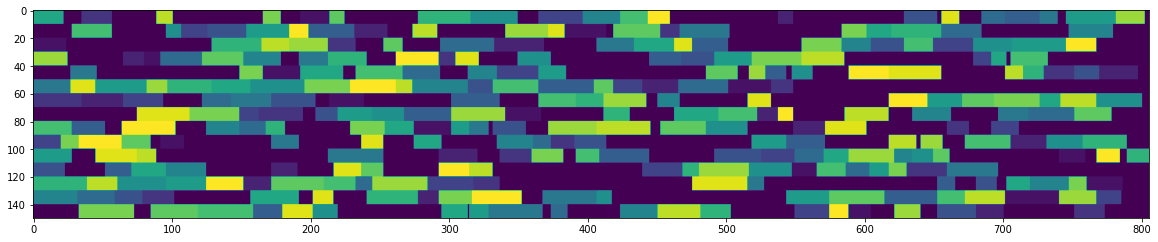

In [42]:
with open('abz7') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

    random.seed(1981)
    rep, makespan, data = ea_recom(n, m, jobs, 2**13, 2**13, 60*9)
    mkSolution(rep, n, m, jobs, makespan)

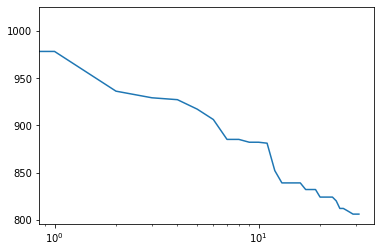

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
plt.show()

In [44]:
makespan

806

In [45]:
print(data)

[1015, 978, 936, 929, 927, 917, 906, 885, 885, 882, 882, 881, 852, 839, 839, 839, 839, 832, 832, 832, 824, 824, 824, 824, 820, 812, 812, 810, 808, 806, 806, 806]
